In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **FLIGHT PRICE PREDICTION**

## Importing libraries


In [108]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


## Importing Data

In [109]:
train_data = pd.read_excel('/content/drive/MyDrive/Portfolio/P1/flight_price_train.xlsx')
train_data.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6055,IndiGo,18/05/2019,Delhi,Cochin,DEL → PNQ → COK,23:30,04:35 19 May,5h 5m,1 stop,No info,10958
444,Jet Airways,9/06/2019,Kolkata,Banglore,CCU → BOM → BLR,18:55,04:40 10 Jun,9h 45m,1 stop,In-flight meal not included,9663
3566,Jet Airways,6/04/2019,Delhi,Cochin,DEL → COK,11:00,14:15,3h 15m,non-stop,In-flight meal not included,4886
8570,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,15:00,04:25 07 Jun,13h 25m,1 stop,In-flight meal not included,10262
7870,Jet Airways,1/06/2019,Delhi,Cochin,DEL → BOM → COK,14:00,19:00,5h,1 stop,No info,14714


In [110]:
train_data.shape

(10683, 11)

In [111]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [112]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [113]:
train_data.dropna(inplace=True)

In [114]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10682.0,9087.214567,4611.54881,1759.0,5277.0,8372.0,12373.0,79512.0


In [115]:
#Shape after droping NA row
train_data.shape

(10682, 11)

In [116]:
train_data['Airline'].value_counts()
# maximum of JetAirline flights are present in the datset

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [117]:
train_data['Source'].value_counts()
# maximum flights take off from Delhi

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [118]:
train_data['Destination'].value_counts()
# maximum flights touch down at Cochin

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [119]:
train_data['Total_Stops'].value_counts()
# There are more flights that have only one-stop than non-stop flights

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [120]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [121]:
train_data['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

# **Explotary Data Analysis (EDA)**
- We can see that the dataset has attribute Data_of_journey is a object datatype
* therefore, we have to convert it to a timestamp so as to use this column for proper prediction.
- 

In [122]:
train_data.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2013,Jet Airways,21/03/2019,Delhi,Cochin,DEL → MAA → BOM → COK,16:10,18:50 22 Mar,26h 40m,2 stops,No info,13180
8677,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 10 May,23h 45m,1 stop,No info,15554
68,Air India,21/05/2019,Delhi,Cochin,DEL → BHO → BOM → COK,05:55,19:15,13h 20m,2 stops,No info,10861
8939,Jet Airways,15/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,04:40 16 May,22h 10m,1 stop,No info,13941
6894,Multiple carriers,3/06/2019,Delhi,Cochin,DEL → BOM → COK,06:00,21:00,15h,1 stop,No info,8475


In [123]:
# Converting object dtype to datetime dtype
train_data['Journey_day'] = pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y').dt.day
# Here .dt.date will only extract day from that date 

In [124]:
# Converting object dtype to datetime dtype
train_data['Journey_month'] = pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y').dt.month
# Here .dt.month will only extract month from that date 

In [125]:
train_data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [126]:
# Since we have converted 'Date of Journey' to required dtype, we can drop the column
train_data.drop(['Date_of_Journey'], axis=1, inplace=True)

In [127]:
# Similarly converting Dep_Time dtpe to the required dtype for prediction

# Extracting hours 
train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour
# Extracting minutes
train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

In [128]:
# Now we can drop the column Dep_Time column which is in object dtype
train_data.drop(['Dep_Time'],axis=1, inplace= True)

In [129]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [130]:
# Similarly applying the above steps to 'Arival_time' column

# Extracting hours 
train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
# Extracting minutes
train_data['Arrival_min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

# Now we can drop the column Arrival_Time column which is in object dtype
train_data.drop(['Arrival_Time'],axis=1, inplace= True)

train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [131]:
# Duration is the time taken by the plane to reach the destination
# It is the difference betweeen departure time asnd arrival time

# Assigning and converting Duration column into list

duration = list(train_data['Duration'])


for i in range(len(duration)):
  if len(duration[i].split()) != 2: # Checking if duration contains only hours or mins
    if 'h' in duration[i]:
      duration[i] = duration[i].strip() + ' 0m'  #adds 0 min
    else:
      duration[i] = '0h ' + duration[i]

duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))   #Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))     #Extract minutes from duration

In [132]:
# Adding duration hours and duration minutes 

train_data['Duration_hours'] = duration_hours
train_data['Duration_mins'] = duration_mins

In [133]:
train_data.drop(['Duration'], axis=1, inplace = True)

In [134]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Handling Categorical values
- Nominal data --> data that are not in any order --> use ONE HOT ENCODING
- Ordinal data --> data that are in order --> use LABEL ENCODER
 

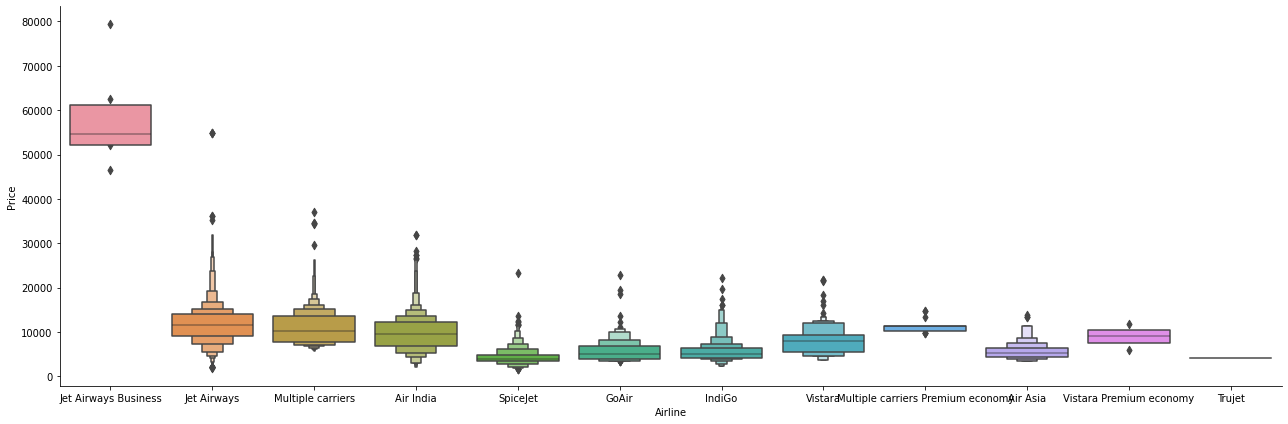

In [135]:
# From graph we can see that Jet Airways Business have the highest Price.

#Airline v/s Price
data=train_data.sort_values('Price', ascending= False)
sns.catplot(y='Price', x='Airline', data=data, kind='boxen', height= 6, aspect= 3)
plt.show()

In [136]:
# as airline is nominal categorical data we will use one hot encoding
Airline = train_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


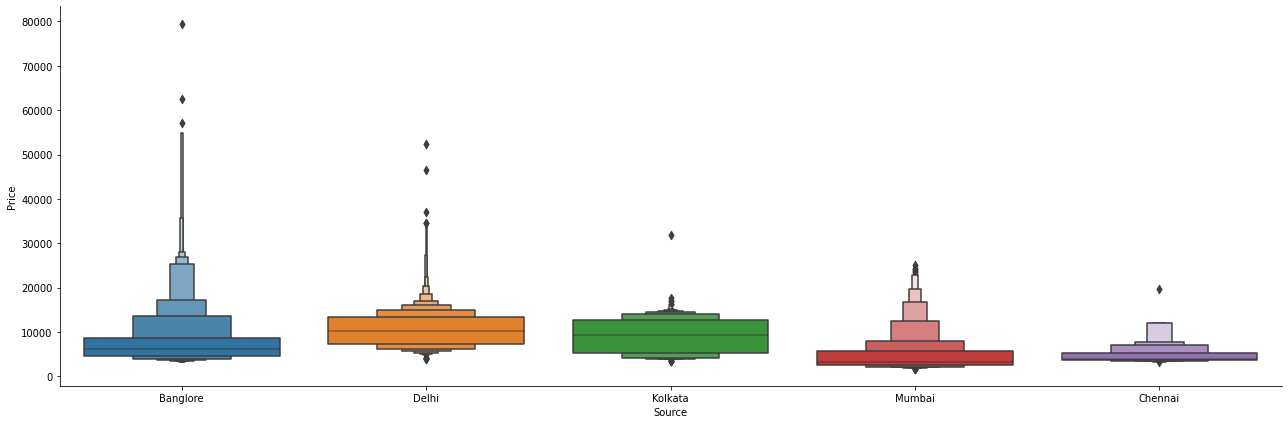

In [137]:
# From graph we can see that Jet Airways Business have the highest Price.

#Source v/s Price
data=train_data.sort_values('Price', ascending= False)
sns.catplot(y='Price', x='Source', data=data, kind='boxen', height= 6, aspect= 3)
plt.show()

In [138]:
# as Source is nominal categorical data we will use one hot encoding

Source= train_data[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [139]:
# as Destination is nominal categorical data we will use one hot encoding

Destination = train_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [140]:
train_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [141]:
# additional_Info contains 80% no_info
# Route and additional info are related to eachother 

train_data.drop(['Route','Additional_Info'], axis = 1, inplace = True)

In [142]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [143]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({'non-stop' : 0, '1 stop' : 1, '2 stops' : 2, '3 stops' : 3, '4 stops' : 4}, inplace=True)

In [144]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [145]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [146]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [147]:
data_train.drop(['Airline','Source','Destination'], axis=1, inplace=True)

In [148]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [149]:
data_train.shape

(10682, 30)

## TEST DATA

In [150]:
test_data= pd.read_excel('/content/drive/MyDrive/Portfolio/P1/flight_price_test.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [151]:
test_data.shape

(2671, 10)

## PreProcessing on Test Data

In [152]:
# PreProcessing
print('test data info')
print('-'*100)
print(test_data.info())

print()
print()

print('Null values')
print('-'*100)
print(test_data.isna().sum())

print()
print()

#EDA

#Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data['Date_of_Journey'], format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data['Dep_hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_min'] = pd.to_datetime(test_data['Dep_Time']).dt.minute
test_data.drop(['Dep_Time'],axis=1, inplace= True)

#Arrival_Time
test_data['Arrival_hour'] = pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_min'] = pd.to_datetime(test_data['Arrival_Time']).dt.minute
test_data.drop(['Arrival_Time'],axis=1, inplace= True)

#Duration
duration = list(test_data['Duration'])

for i in range(len(duration)):
  if len(duration[i].split()) != 2:
    if 'h' in duration[i]:
      duration[i] = duration[i].strip() + ' 0m'
    else:
      duration[i] = '0h ' + duration[i]

duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

#Adding duration hours and duration minutes
test_data['Duration_hours'] = duration_hours
test_data['Duration_mins'] = duration_mins
test_data.drop(['Duration'], axis=1, inplace = True)

#Categorical Data

print('Airline')
print('-'*100)
print(test_data['Airline'].value_counts())
Airline = pd.get_dummies(test_data['Airline'], drop_first=True)

print()
print()

print('Source')
print('-'*100)
print(test_data['Source'].value_counts())
Source = pd.get_dummies(test_data['Source'], drop_first=True)

print()
print()

print('Destination')
print('-'*100)
print(test_data['Destination'].value_counts())
Source = pd.get_dummies(test_data['Destination'], drop_first=True)


# additional_Info contains 80% no_info
# Route and additional info are related to eachother 
test_data.drop(['Route','Additional_Info'], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

#Concating the dataframe--> testdata + Airline + Source + Destination
data_test=pd.concat([test_data,Airline,Source,Destination], axis=1)

data_test.drop(['Airline','Source','Destination'],axis = 1, inplace = True)

print()
print()

print(data_test.shape)

test data info
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values
----------------------------------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination

In [153]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1.0,6.0,6.0,17.0,30.0,4.0,25.0,10.0,55.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0,0,0,0,1
1,1.0,12.0,5.0,6.0,20.0,10.0,20.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,1.0,21.0,5.0,19.0,15.0,19.0,0.0,23.0,45.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0
3,1.0,21.0,5.0,8.0,0.0,21.0,0.0,13.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0
4,0.0,24.0,6.0,23.0,55.0,2.0,45.0,2.0,50.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0,0,0,0,1


# Feature Selection 
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods.
- 1. **Heatmap**
- 2. **feature_importance**
- 3. **SelectKBest**


In [154]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [155]:
# substituting Price column as the last column 
second=data_train.pop('Price')
data_train.insert(29,'Price',second)
data_train.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,1,3897
1,2,1,5,5,50,13,15,7,25,1,...,0,0,1,0,0,0,0,0,0,7662
2,2,9,6,9,25,4,25,19,0,0,...,0,1,0,0,1,0,0,0,0,13882
3,1,12,5,18,5,23,30,5,25,0,...,0,0,1,0,0,0,0,0,0,6218
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,1,13302


In [156]:
data_train.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Price'],
      dtype='object')

In [157]:
X=data_train.drop(['Price'], axis = 1)
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [158]:
y=data_train.iloc[:,-1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

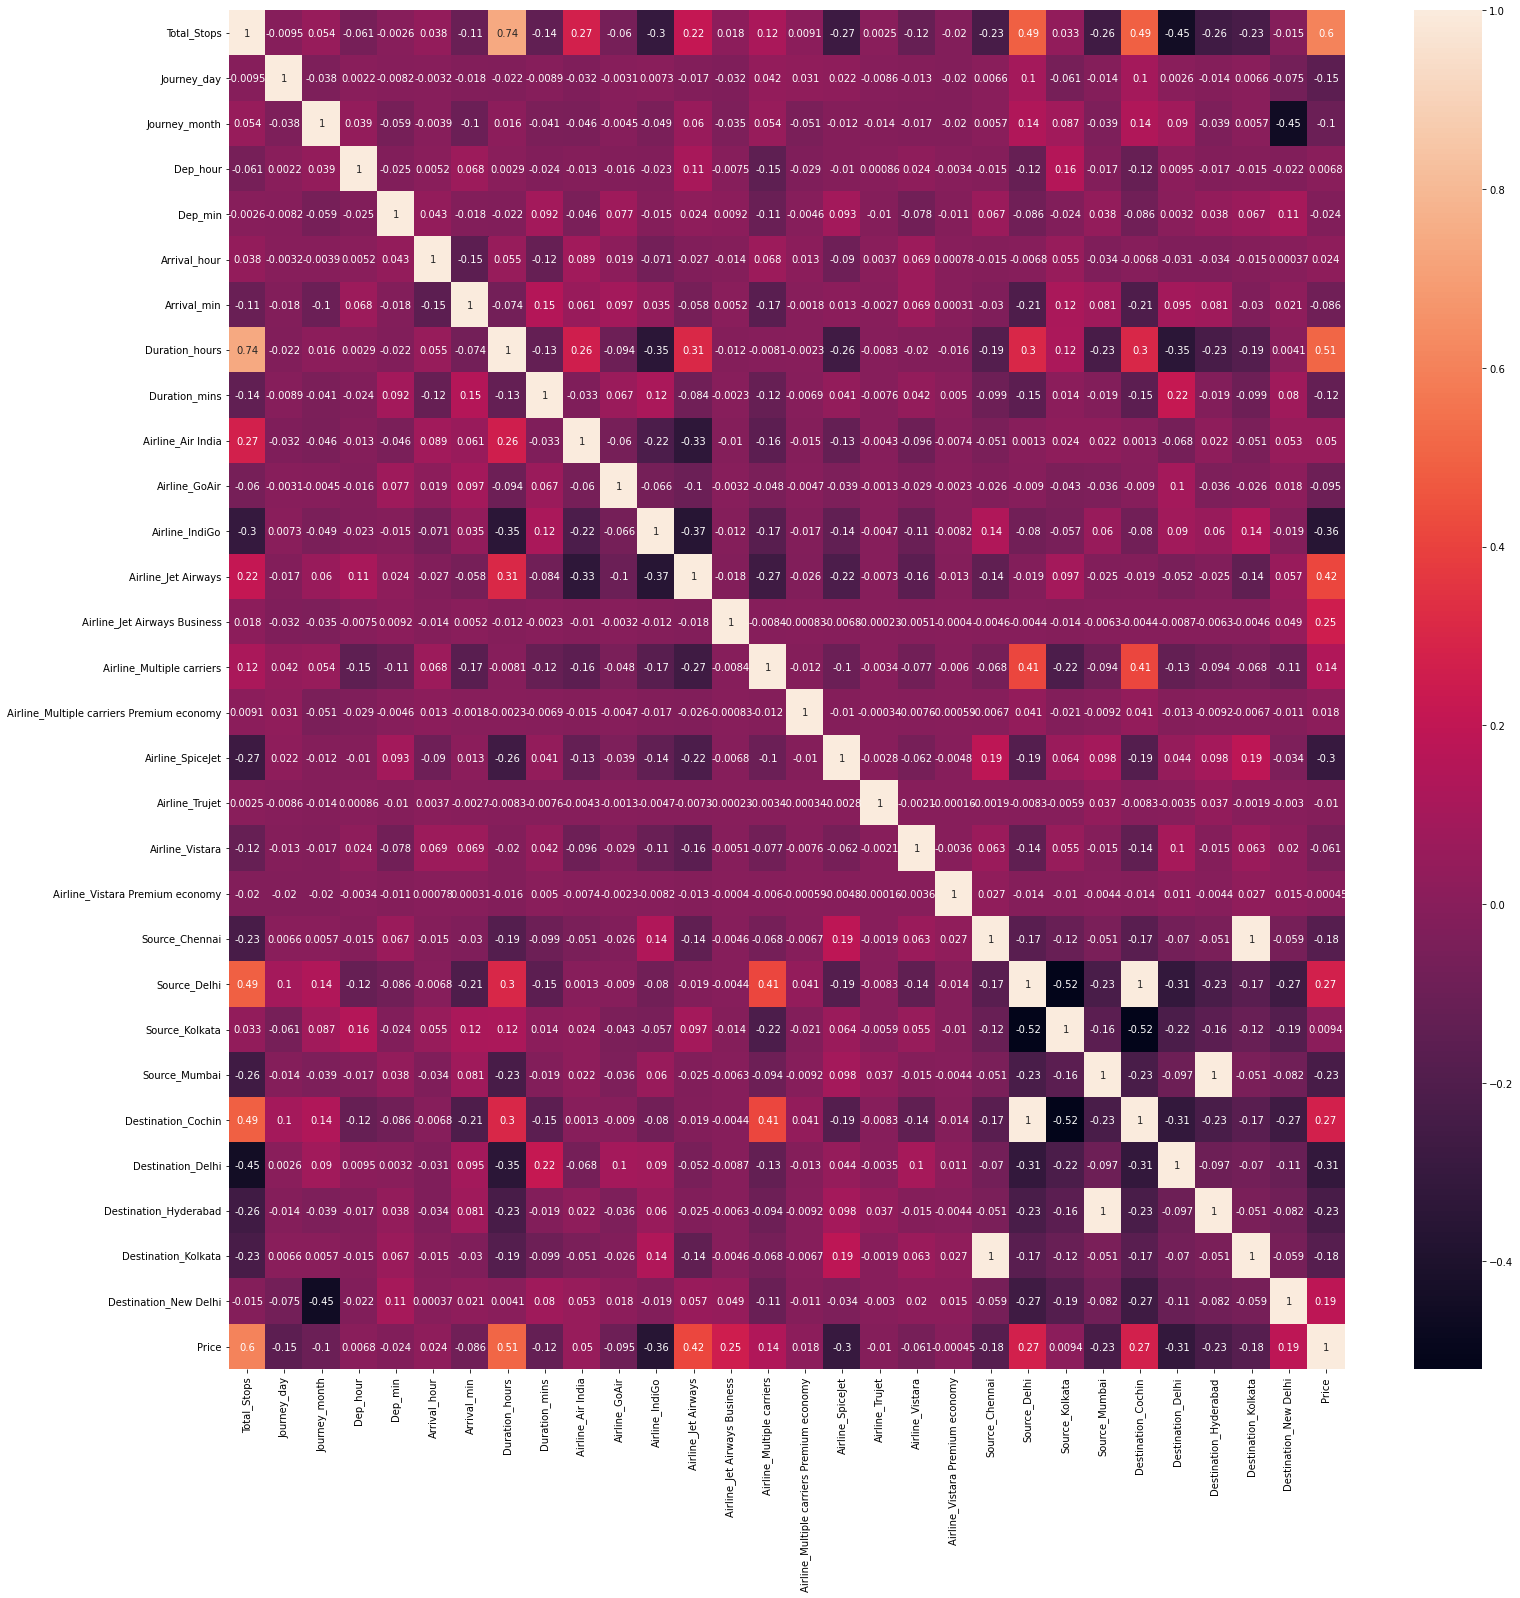

In [159]:
# Find correlation betweeen independent and dependent variables

plt.figure(figsize=(25,25))
sns.heatmap(data_train.corr(),annot=True,)
plt.show()

In [160]:
# Important features using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [161]:
print(selection.feature_importances_)

[2.10569277e-01 1.45351370e-01 5.28700315e-02 2.42607348e-02
 2.12978315e-02 2.70574066e-02 1.90281612e-02 1.27023330e-01
 1.76810678e-02 1.11744495e-02 1.96146114e-03 1.81219634e-02
 1.40000907e-01 6.74699253e-02 1.77860245e-02 8.12455738e-04
 2.95111010e-03 1.09291265e-04 5.04043176e-03 8.52626600e-05
 4.54478914e-04 1.26718117e-02 3.23669715e-03 7.12254949e-03
 1.23851081e-02 2.06900227e-02 7.50613706e-03 4.42224046e-04
 2.48384784e-02]


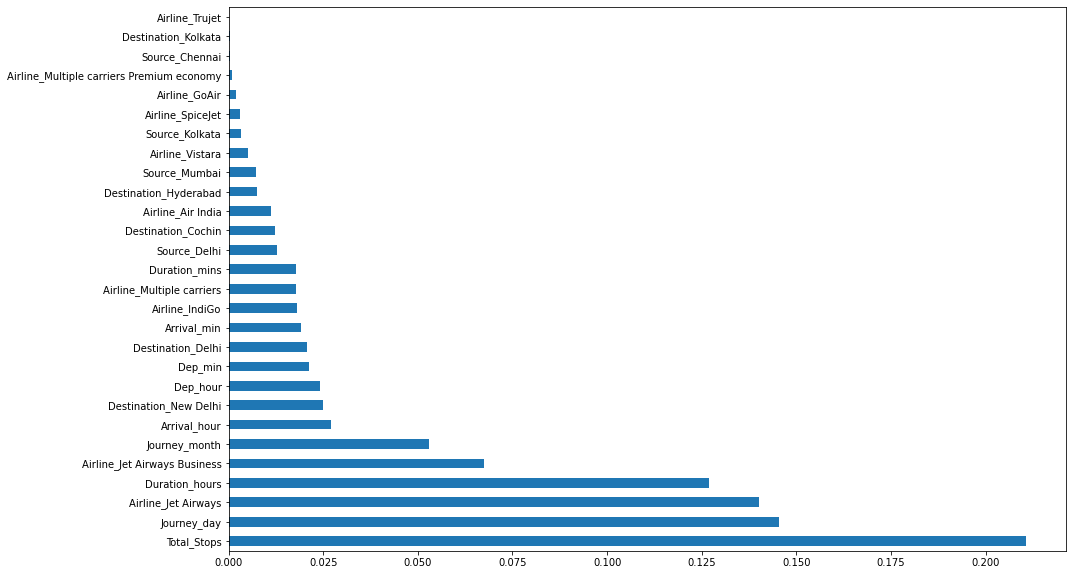

In [162]:
# plot graph of feature importance for better visualisation

plt.figure(figsize=(15,10))
feat_imp = pd.Series(selection.feature_importances_, index= X.columns)
feat_imp.nlargest(28).plot(kind='barh')
plt.show()

# **Fitting Model Using Random Forest Regressor**


In [163]:
# Spliting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [164]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [165]:
y_pred = reg_rf.predict(X_test)

In [166]:
# training score
reg_rf.score(X_train,y_train)

0.9537840187338703

In [167]:
#testing score
reg_rf.score(X_test, y_test)

0.7965201600803676

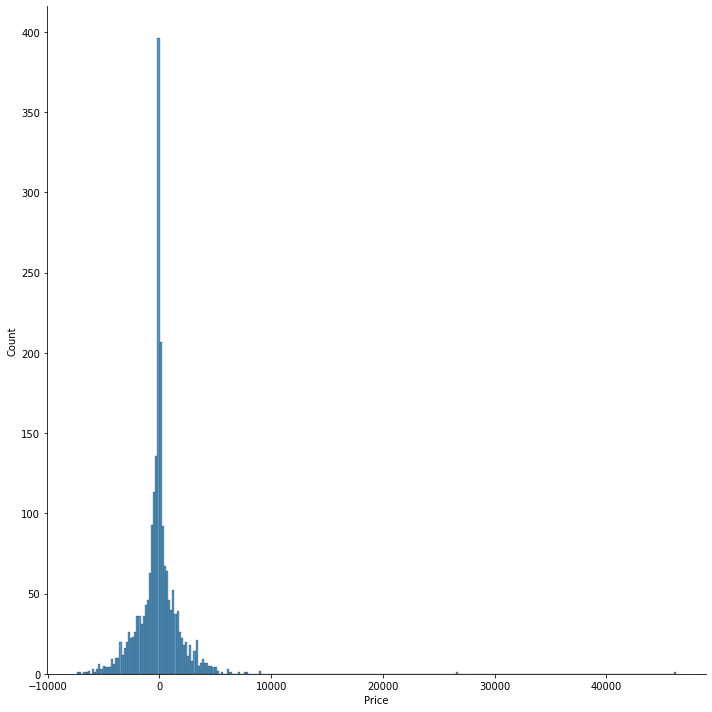

In [168]:
sns.displot(y_test-y_pred, height=10)
plt.show()

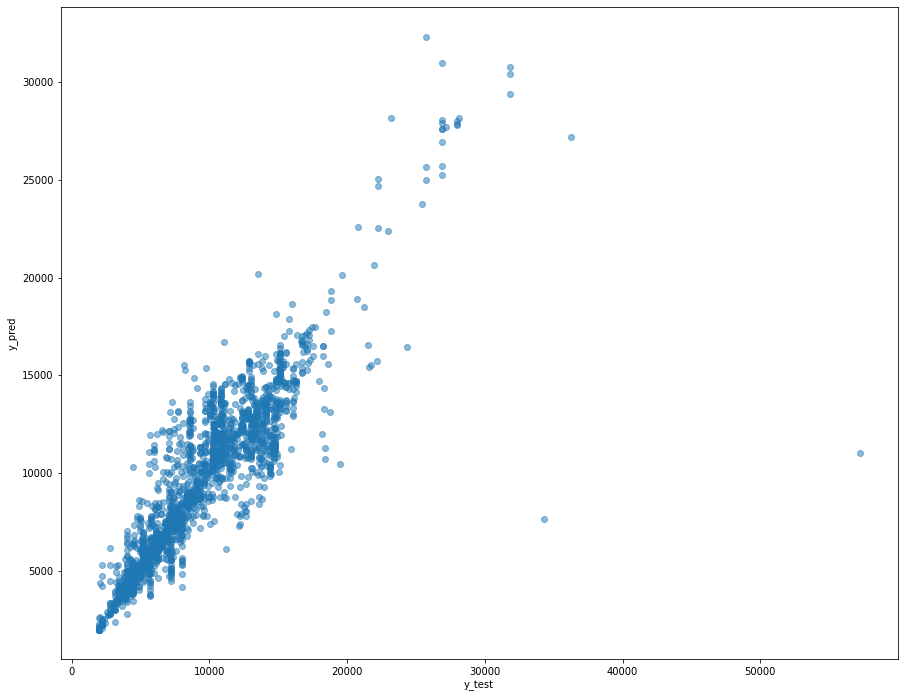

In [169]:
plt.figure(figsize=(15,12))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [170]:
# Now to check for accuracy of the model 
from sklearn import metrics

In [171]:
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE:  1174.437439796711
MSE:  4387443.769178536
RMSE:  2094.622583946458


In [172]:
metrics.r2_score(y_test, y_pred)

0.7965201600803676

# HyperParameterTuning
- Choose following methods for hyperparameter tuning
1. **RandomizedSearchCV** 
2. **GridSearchCV**
-

In [173]:
from sklearn.model_selection import RandomizedSearchCV

In [174]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [175]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [176]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [177]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [178]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [179]:

prediction = rf_random.predict(X_test)

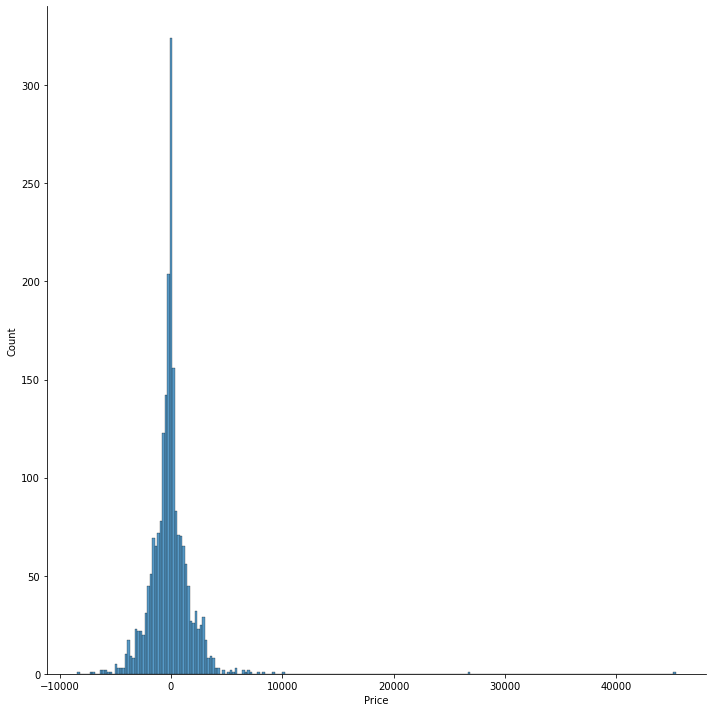

In [180]:
# plt.figure(figsize = (20,12))
sns.displot(y_test-prediction, height=10)
plt.show()

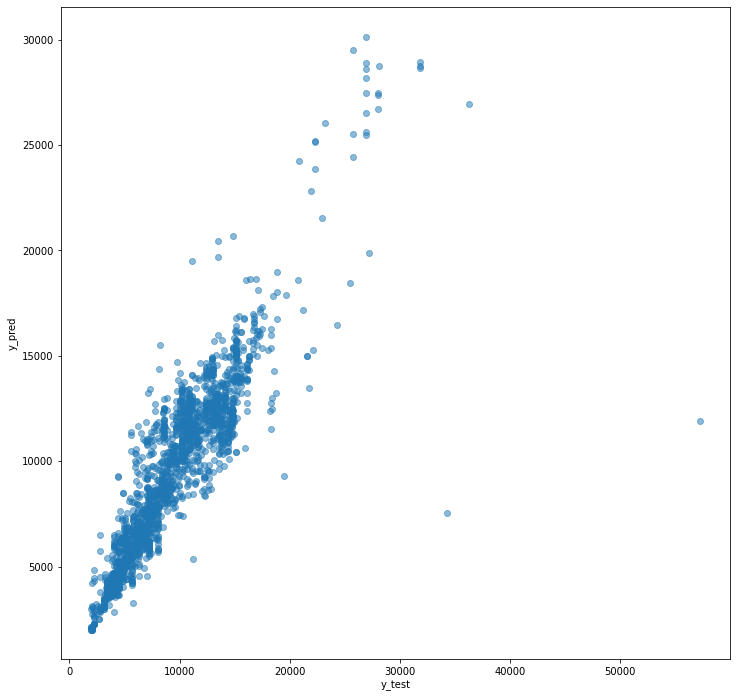

In [181]:
plt.figure(figsize = (12,12))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [182]:

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1164.5241971384273
MSE: 4053907.660107839
RMSE: 2013.4318116360034


In [183]:
y_prediction = reg_rf.predict(X_test)

In [184]:
metrics.r2_score(y_test, prediction)

0.8119888196579306